In [166]:
import serial
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Port
port = '/dev/cu.usbmodem1101'
usb = serial.Serial(port)
f = open('arduinoB1_6', 'w')
f.write('Time,Tau\n')

#variables
#t = []
#x = []
n = 0

#loop
while(n < 1000):
    arduino = usb.readline().rstrip()
    #print(n, arduino.decode())
    f.write('{}\n'.format(arduino.decode()))
    #data = arduino.decode().split(",")
    #x.append(data[1])
    #t.append(data[0])
    n = n+1

df = pd.read_csv('arduinoB1_6')

df

,Time,Tau
0,1006736,1368
1,1021296,1368
2,1035830,1322
3,1050400,1343
4,1064944,1313
...,...,...
633,10090054,1291
634,10105658,1300
635,10121236,1258
636,10136804,1186


In [167]:
time = df['Time'].to_numpy()
tau = df['Tau'].to_numpy()

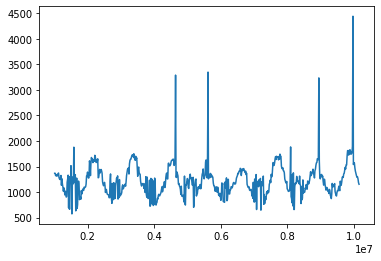

In [168]:
plt.plot(time, tau)
#plt.xlim(0.8*10**8, 0.9*10**8)